In [9]:
import warnings
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pyramid as pm
from sklearn import metrics
from pmdarima import auto_arima
warnings.filterwarnings('ignore')

In [11]:
from  IPython.core.interactiveshell import InteractiveShell
InteractiveShell.as_node_interactivity = "all"

In [12]:
flight_data = sns.load_dataset("flights") 
flight_data. head() 
flight_data.tail() 
flight_data.shape 
flight_data.describe() 
flight_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [13]:
flight_data. head() 

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [14]:
flight_data_pivot = flight_data.pivot('month','year','passengers') 
                                      
flight_data_pivot 

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


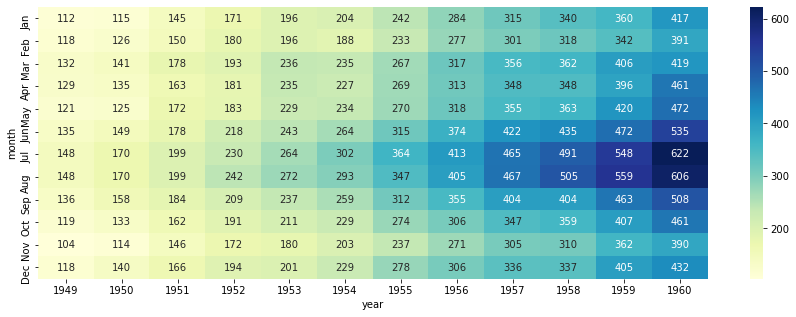

In [16]:
plt.figure(figsize=(15,5))
sns.heatmap(flight_data_pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

In [19]:
month = pd.date_range('19490131', periods=144, freq='M')
month

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [20]:
flight_data['datestamp'] = month
flight_data.head()

,year,month,passengers,datestamp
0,1949,Jan,112,1949-01-31
1,1949,Feb,118,1949-02-28
2,1949,Mar,132,1949-03-31
3,1949,Apr,129,1949-04-30
4,1949,May,121,1949-05-31


In [22]:
data = flight_data.loc[:,('datestamp', 'passengers')]
data.head()


,datestamp,passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [23]:
data.describe()

,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [25]:
data.set_index('datestamp', inplace=True)
data.head()

,passengers
datestamp,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


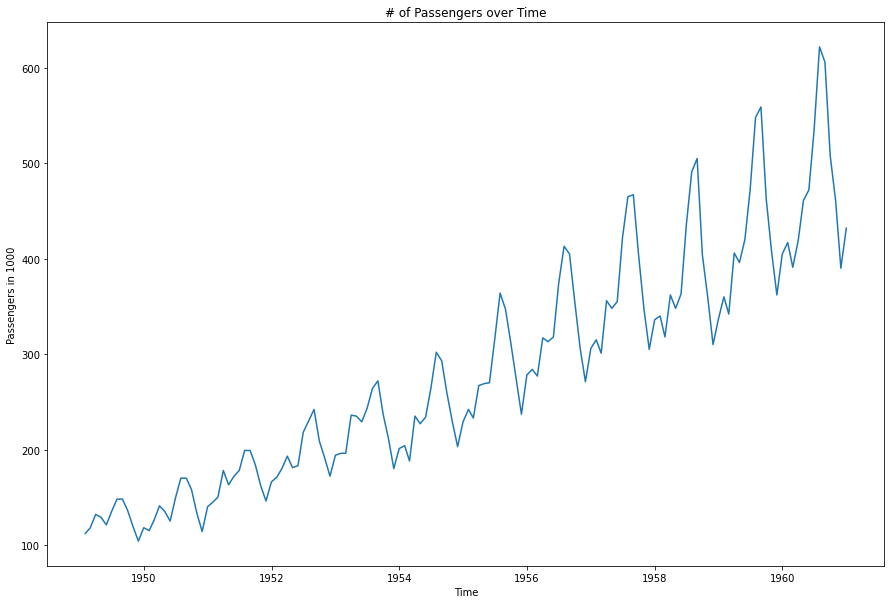

In [27]:
plt.figure(figsize=(15,10)) 
plt.plot(data) 
plt.xlabel ('Time') 
plt.ylabel ('Passengers in 1000') 
plt.title ('# of Passengers over Time') 
plt.show; 

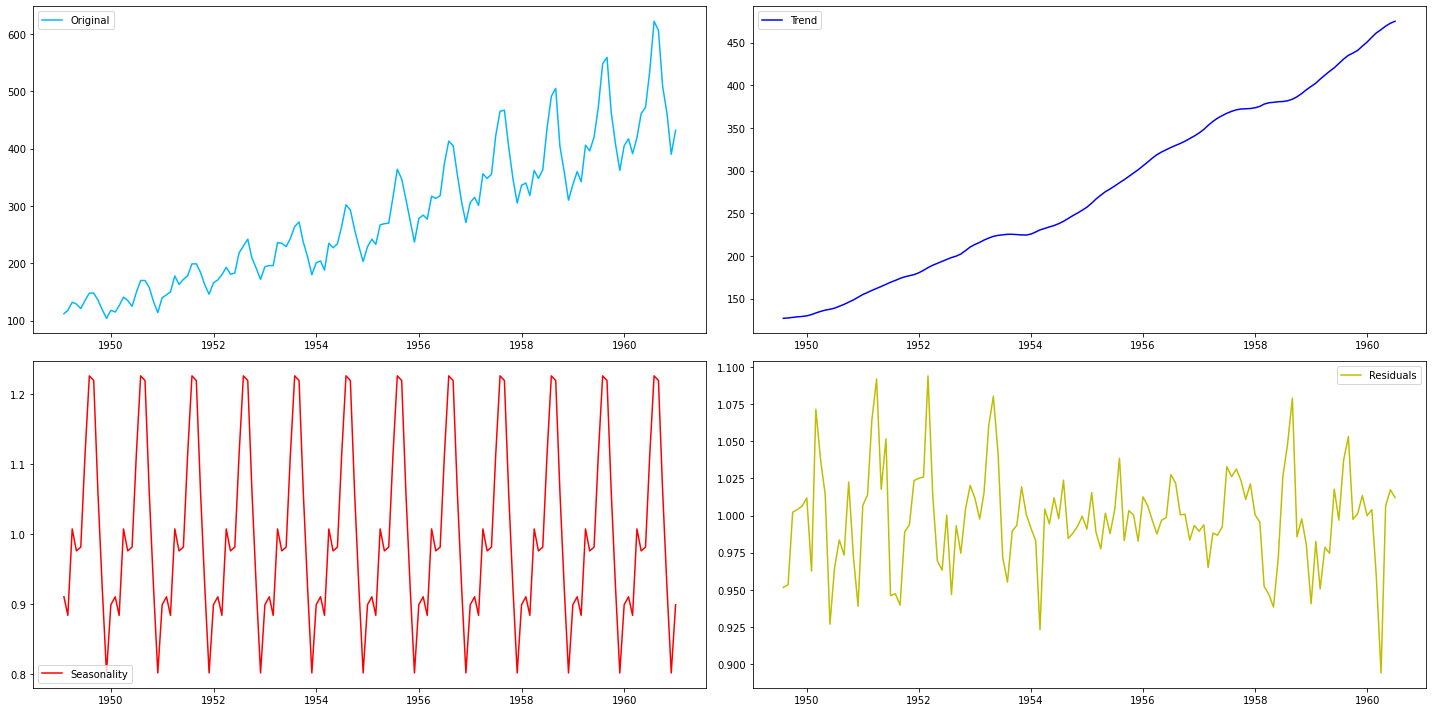

In [34]:
decomposition = seasonal_decompose(data, model ='multiplicative') 

# plot trend of the series 
plt.figure(figsize=(20,10)) 
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 


plt.subplot(221) 
plt.plot(data,color = '#00b8ff', label='Original') 
plt.legend(loc='best') 
plt.subplot(222) 
plt.plot(trend, 'b', label='Trend') 
plt.legend(loc='best') 
plt.subplot(223) 
plt.plot(seasonal, color = 'red', label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(224) 
plt.plot(residual, 'y', label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show(); 


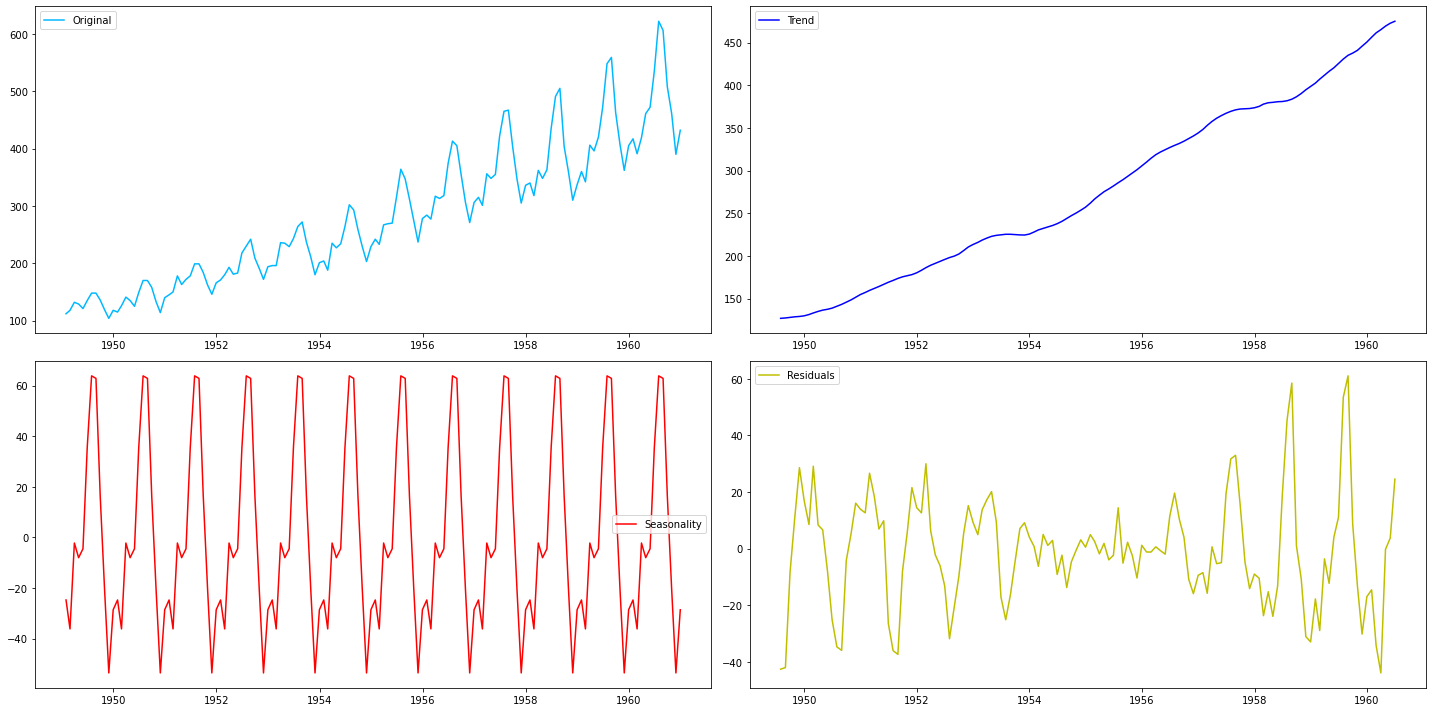

In [36]:
decomposition = seasonal_decompose(data, model ='additvie')

# plot trend of the series 
plt.figure(figsize=(20,10)) 
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 


plt.subplot(221) 
plt.plot(data,color = '#00b8ff', label='Original') 
plt.legend(loc='best') 
plt.subplot(222) 
plt.plot(trend, 'b', label='Trend') 
plt.legend(loc='best') 
plt.subplot(223) 
plt.plot(seasonal, color = 'red', label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(224) 
plt.plot(residual, 'y', label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show(); 


In [42]:
from pmdarima.arima import ADFTest 

adf_test = ADFTest(alpha=0.05) 
adf_test.is_stationary(data) 

<ipython-input-42-48910c685409>:4: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  adf_test.is_stationary(data)


(0.01, False)

In [43]:
train, test = data[:100], data[100:] 

print(train.shape)
print(test.shape)


(100, 1)
(44, 1)


/home/ehsan/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


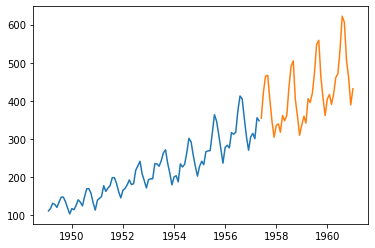

In [44]:
plt.plot(train)
plt.plot(test)
plt.show()

In [45]:
Arima_model = auto_arima(train, start_p=1, start_q=1, max_p=8, max_q=8, 
                         start_P=0, start_Q=0, max_P=8, max_Q=8, 
                         m=12,seasonal=True,trace=True, d=1, D=1, 
                         error_action='warn',suppress_warnings=True, 
                         stepwise=True, random_state=20, n_fits=30) 
Arima_model.summary() 


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=647.341, Time=1.31 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=650.796, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=644.203, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=644.733, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=645.995, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=646.172, Time=0.17 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=646.187, Time=0.16 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=644.600, Time=0.11 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.23 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=647.442, Time=0.04 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=646.085, Time=0.09 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=645.647, Time=0.12 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=644.346, Time=0.07 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=647.580, Time=0.18 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -319.101
Date:                            Fri, 20 Nov 2020   AIC                            644.203
Time:                                    01:14:43   BIC                            651.601
Sample:                                         0   HQIC                           647.182
                                            - 100                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2434      0.097     -2.512      0.012      -0.433      -0.054
ar.S.L12      -0.2127      0.087     -2.432      0.015      -0.384      -0.041
sigma2        89.1842     14.080      6.334      0.000      61.587     116.781
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.97   Prob(JB):                         0.30
Heteroskedasticity (H):               1.32   Skew:                             0.40
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
prediction = pd.DataFrame(Arima_model.predict(n_periods=44), 
                          index = test.index) 

prediction. columns = ['Predicted_Passengers']


/home/ehsan/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/ehsan/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


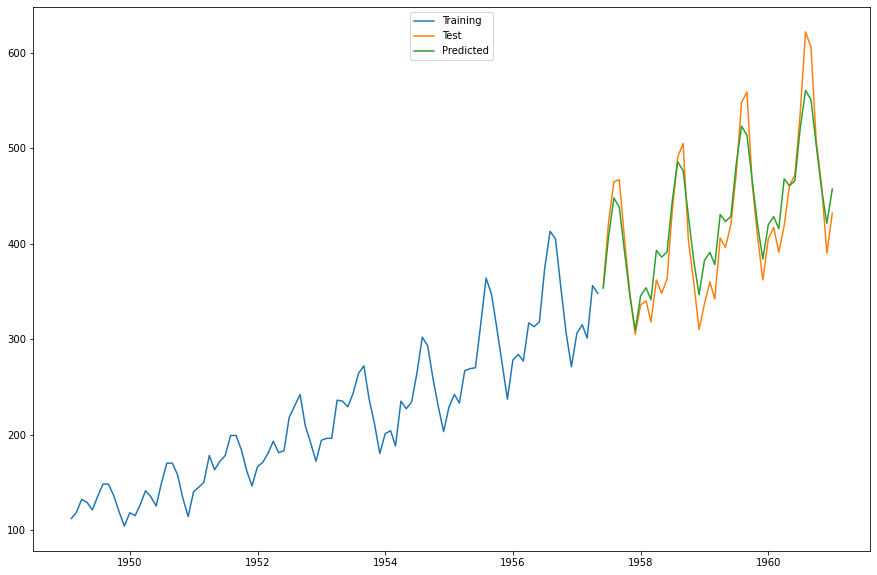

In [47]:
plt.figure(figsize=(15,10)) 
plt.plot(train, label = 'Training') 
plt.plot(test, label = 'Test') 
plt.plot(prediction, label = 'Predicted') 
plt.legend(loc= 'upper center') 
plt.show(); 


In [49]:
test['Predicted_Passengers'] = prediction 

test['Error'] = test['passengers']-test['Predicted_Passengers']

test.head(10)


/home/ehsan/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,passengers,Predicted_Passengers,Error
datestamp,,,
1957-05-31,355,353.433649,1.566351
1957-06-30,422,406.781321,15.218679
1957-07-31,465,447.984392,17.015608
1957-08-31,467,438.051605,28.948395
1957-09-30,404,391.246543,12.753457
1957-10-31,347,344.585092,2.414908
1957-11-30,305,309.159969,-4.159969
1957-12-31,336,345.436075,-9.436075
1958-01-31,340,353.798005,-13.798005


In [50]:
metrics.mean_absolute_error(test.passengers, test.Predicted_Passengers) 

/home/ehsan/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


21.538631306122987

In [53]:
metrics.mean_squared_error(test.passengers, test.Predicted_Passengers) 

686.7476372585894

In [55]:
metrics.median_absolute_error(test.passengers, test.Predicted_Passengers) 


22.334088580911953

/home/ehsan/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


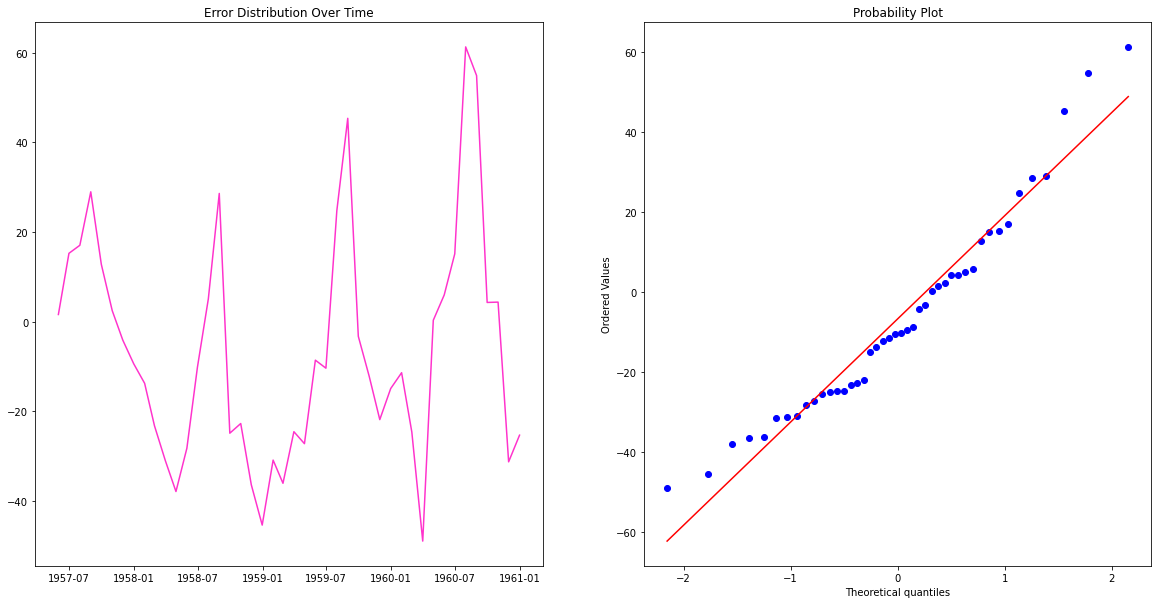

In [59]:
plt.figure(figsize=(20,10)) 
plt.subplot(121) 
plt.plot(test.Error, color ='#ff33CC') 
plt.title('Error Distribution Over Time') 
plt.subplot(122) 
scipy.stats.probplot(test.Error, plot=plt) 
plt.show; 

# plt.figure(figsize=(20,10)) 
# pm.autocorr_plot(test.Error) 
# plt.show(); 
